# Regression

In [5]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")

loadlibrary("MASS")
loadlibrary("plotly")
loadlibrary("reshape2")

plot_size(4, 3)

## Dataset
Both independent and dependend variables are numeric. 

In [7]:
exp_table(t(sapply(Boston, class)))
exp_table(Boston)
?MASS::Boston

crim    zn      indus   chas    nox     rm      age     dis     rad    
1 numeric numeric numeric integer numeric numeric numeric numeric integer
  tax     ptratio black   lstat   medv   
1 numeric numeric numeric numeric numeric

crim    zn indus chas nox   rm    age  dis    rad tax ptratio black  lstat
1 0.00632 18 2.31  0    0.538 6.575 65.2 4.0900 1   296 15.3    396.90 4.98 
2 0.02731  0 7.07  0    0.469 6.421 78.9 4.9671 2   242 17.8    396.90 9.14 
3 0.02729  0 7.07  0    0.469 7.185 61.1 4.9671 2   242 17.8    392.83 4.03 
4 0.03237  0 2.18  0    0.458 6.998 45.8 6.0622 3   222 18.7    394.63 2.94 
5 0.06905  0 2.18  0    0.458 7.147 54.2 6.0622 3   222 18.7    396.90 5.33 
6 0.02985  0 2.18  0    0.458 6.430 58.7 6.0622 3   222 18.7    394.12 5.21 
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7

## Fitting a first model
Explaining house price using lower status population variable.

$lm$ builds the model.

$summary$ describes the significance of the built model.

In [8]:
lm.fit = lm(medv ~ lstat, data = Boston)

summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


## prediction
The $predict$ function makes predictions from adjusted model.

The predictions can be presented with either $confidence$ and $prediction$ intervals. 

These intervals can be analyzed at https://statisticsbyjim.com/hypothesis-testing/confidence-prediction-tolerance-intervals/


In [9]:
predict(lm.fit, data.frame(lstat =(c(5, 10, 15))), interval = "confidence")
predict(lm.fit, data.frame(lstat =(c(5, 10, 15))), interval = "prediction")

fit      lwr      upr     
1 29.80359 29.00741 30.59978
2 25.05335 24.47413 25.63256
3 20.30310 19.73159 20.87461

fit      lwr       upr     
1 29.80359 17.565675 42.04151
2 25.05335 12.827626 37.27907
3 20.30310  8.077742 32.52846

## Plotting the regression model

It is a good practice to plot the regression model. It enables us to have a feeling of its quality.

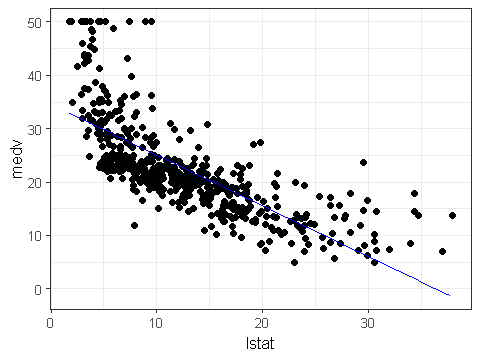

In [10]:
axis_x <- seq(min(Boston$lstat), max(Boston$lstat), by = 0.5)
axis_y <- predict(lm.fit, data.frame(lstat=axis_x))

data_adj = data.frame(lstat=axis_x, medv=axis_y)

ggplot(Boston) + geom_point(aes(x = lstat, y = medv)) + geom_line(data=data_adj,aes(x=lstat,y=medv), color="Blue") + theme_bw(base_size = 10) 

# Polynomial regression

It is possible to introduce polynomial dimensions if independent data. 

In [16]:
lm.fit_p =lm(medv~lstat+I(lstat^2), data=Boston)
summary (lm.fit_p)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


## Plotting the polynominal regression model

It seems to be better adjusted with the data. Is it significant?

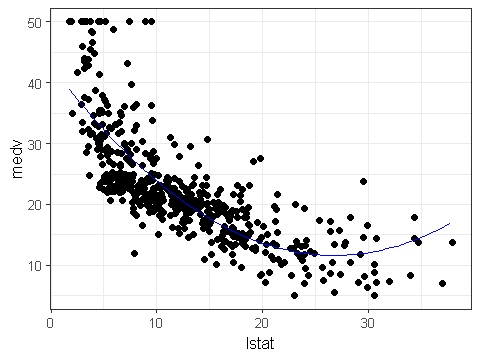

In [18]:
axis_x <- seq(min(Boston$lstat), max(Boston$lstat), by = 0.5)
axis_x2 <- axis_x^2
axis_y <- predict(lm.fit_p, data.frame(lstat=axis_x, `I(lstat^2)`=axis_x2))


data_adj = data.frame(lstat=axis_x, medv=axis_y)
ggplot(Boston) + geom_point(aes(x = lstat, y = medv)) + geom_line(data=data_adj,aes(x=lstat,y=medv), color="Blue") + theme_bw(base_size = 10) 

## ANOVA test

It is possible to check if a built model is significantly better than another model using ANOVA test. 

The null hypothesis is that both model are not different ($\operatorname{p-value} > 5\%$). The alternative hypothesis says that they are different ($\operatorname{p-value} < 5\%$). 

In [19]:
anova(lm.fit, lm.fit_p)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 504    19472.38 NA       NA        NA           NA
2 503    15347.24  1 4125.138  135.1998 7.630116e-28

# Multiple regression

It is possible to use more than one dimension for independent data. 

In [21]:
lm.fit2 =lm(medv~lstat+age, data=Boston)
summary (lm.fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


## Checking the significance of the model


In [22]:
anova(lm.fit ,lm.fit2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)     
1 504    19472.38 NA       NA        NA          NA
2 503    19168.13  1 304.2528  7.984043 0.004906776

## Plotting the surface of regression


In [23]:
axis_x <- seq(min(Boston$lstat), max(Boston$lstat), by = 0.5)
axis_y <- seq(min(Boston$age), max(Boston$age), by = 0.5)

lm_surface <- expand.grid(lstat = axis_x, age = axis_y, KEEP.OUT.ATTRS = F)
lm_surface$medv <- predict.lm(lm.fit2, newdata = lm_surface)
lm_surface <- acast(lm_surface, age ~ lstat, value.var = "medv") #y ~ x

b3d_plot <- plot_ly(Boston, 
                     x = ~Boston$lstat, 
                     y = ~Boston$age, 
                     z = ~Boston$medv,
                     text = Boston$medv, 
                     type = "scatter3d",
                     mode = "markers"
)


b3d_plot <- add_trace(p = b3d_plot,
                       z = lm_surface,
                       x = axis_x,
                       y = axis_y,
                       type = "surface")

b3d_plot

Warning message:
"'surface' objects don't have these attributes: 'mode'
Valid attributes include:
'type', 'visible', 'showlegend', 'legendgroup', 'opacity', 'name', 'uid', 'ids', 'customdata', 'selectedpoints', 'hoverinfo', 'hoverlabel', 'stream', 'transforms', 'z', 'x', 'y', 'text', 'surfacecolor', 'cauto', 'cmin', 'cmax', 'colorscale', 'autocolorscale', 'reversescale', 'showscale', 'colorbar', 'contours', 'hidesurface', 'lightposition', 'lighting', '_deprecated', 'xcalendar', 'ycalendar', 'zcalendar', 'scene', 'idssrc', 'customdatasrc', 'hoverinfosrc', 'zsrc', 'xsrc', 'ysrc', 'textsrc', 'surfacecolorsrc', 'key', 'set', 'frame', 'transforms', '_isNestedKey', '_isSimpleKey', '_isGraticule', '_bbox'
"Warning message:
"'surface' objects don't have these attributes: 'mode'
Valid attributes include:
'type', 'visible', 'showlegend', 'legendgroup', 'opacity', 'name', 'uid', 'ids', 'customdata', 'selectedpoints', 'hoverinfo', 'hoverlabel', 'stream', 'transforms', 'z', 'x', 'y', 'text', 'surfa

HTML widgets cannot be represented in plain text (need html)

# Logistic Regression
In this example the predicted dependent variable is categorical.

In [20]:
set.seed(1)
exp_table(t(sapply(iris, class)))
exp_table(iris)

??datasets::iris

To make the problem simpler, lets assume that we intend to predict if a species is $versicolor$ or if it is $other$ species. 

In [28]:
data <- iris
data$versicolor <- as.integer(data$Species=="versicolor")
data$Species <- c('other', 'versicolor')[data$versicolor+1]

Using preprocessing functions, we separate both training and test data. 

In [29]:
sampler <- sample.random(data)
train <- sampler$sample
test <- sampler$residual
head(train)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species    versicolor
112 6.4          2.7         5.3          1.9         other      0         
111 6.5          3.2         5.1          2.0         other      0         
11  5.4          3.7         1.5          0.2         other      0         
60  5.2          2.7         3.9          1.4         versicolor 1         
8   5.0          3.4         1.5          0.2         other      0         
64  6.1          2.9         4.7          1.4         versicolor 1

This dataset is unbalanced using this perspective. If the prediction for $versicolor$ is higher than its probability, it can be classified as $versicolor$. 

In [31]:
t <- mean(train$versicolor)
print(t)

[1] 0.3333333


Creation of logistic regression model using all independent variables. 

In [49]:
pred <- glm(versicolor ~ .-Species, data=train, family = binomial)

Measuring the level of ajustment using training data. 

In [50]:
res <- predict(pred, train, type="response")
res <- as.integer(res >= t)
table(res, train$versicolor)

   
res  0  1
  0 60  9
  1 20 31

Measuring the performance of prediction. 

In [51]:
res <- predict(pred, test, type="response")
res <- res >= t
table(res, test$versicolor)

       
res      0  1
  FALSE 15  6
  TRUE   5  4

Creation of logistic regression model using the independent variables with lower entropy during binning transformation.  

In [69]:
pred <- glm(versicolor ~ Petal.Length + Petal.Width, data=train, family = binomial)

Measuring the level of ajustment using training data. 

In [70]:
res <- predict(pred, train, type="response")
res <- as.integer(res >= t)
table(res, train$versicolor)

   
res  0  1
  0 62  9
  1 18 31

Measuring the performance of prediction. 

In [71]:
res <- predict(pred, test, type="response")
res <- as.integer(res >= t)
table(res, test$versicolor)

   
res  0  1
  0 16  2
  1  4  8